<h1> Bank 

In [6]:
# import librery 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data bank churn 

In [7]:
# loading data
df_churn = pd.read_csv('Bank_Churn.csv')
df_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
missing_values = df_churn.isna().sum()
print(missing_values)

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [10]:
df_churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df_Geography_bal = df_churn.groupby('Geography').agg({
    'Balance':'sum',
    'CustomerId':'count'
})
df_Geography_bal

,Balance,CustomerId
Geography,,
France,3.113325e+08,5014
Germany,3.004029e+08,2509
Spain,1.531236e+08,2477


In [12]:
df_Geog_Esti_sal = df_churn.groupby('Geography').agg({
    'EstimatedSalary':'sum',
    'CustomerId':'count'
})
df_Geog_Esti_sal

,EstimatedSalary,CustomerId
Geography,,
France,5.008945e+08,5014
Germany,2.536936e+08,2509
Spain,2.463143e+08,2477


In [13]:
df_hascr_active_bal = df_churn.groupby(['HasCrCard','IsActiveMember'])['Balance'].sum()
df_hascr_active_bal

HasCrCard  IsActiveMember
0          0                 1.090334e+08
           1                 1.204433e+08
1          0                 2.649912e+08
           1                 2.703910e+08
Name: Balance, dtype: float64

In [14]:
df_hascr_active_est = df_churn.groupby(['HasCrCard','IsActiveMember'])['EstimatedSalary'].sum()
df_hascr_active_est

HasCrCard  IsActiveMember
0          0                 1.412300e+08
           1                 1.561396e+08
1          0                 3.473901e+08
           1                 3.561427e+08
Name: EstimatedSalary, dtype: float64

In [15]:
df_gender_estimate = df_churn.groupby('Gender').agg({
    'EstimatedSalary':'sum',
    'Gender' : 'count'
})
df_gender_estimate

,EstimatedSalary,Gender
Gender,,
Female,4.570328e+08,4543
Male,5.438696e+08,5457


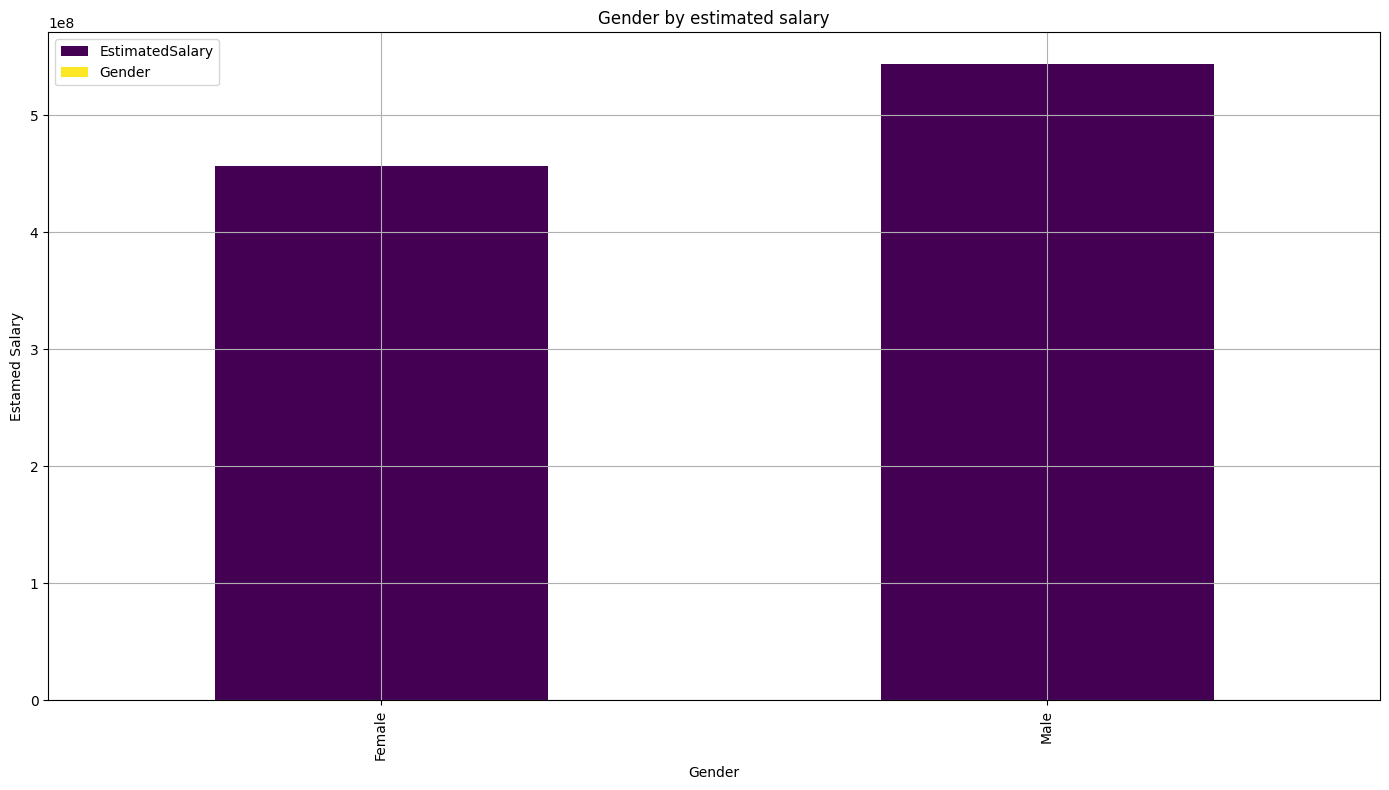

In [16]:
df_gender_estimate.plot(kind='bar',stacked=True,figsize=(14,8), colormap='viridis')
plt.title('Gender by estimated salary')
plt.xlabel('Gender')
plt.ylabel('Estamed Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df_churn.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [18]:
df_acti_est = df_churn.groupby('NumOfProducts').agg({
    'EstimatedSalary': 'sum',
    'IsActiveMember': 'mean'
}).sort_values('EstimatedSalary', ascending=False)
df_acti_est

,EstimatedSalary,IsActiveMember
NumOfProducts,,
1,5.057932e+08,0.504131
2,4.610747e+08,0.532898
3,2.774862e+07,0.424812
4,6.285823e+06,0.483333


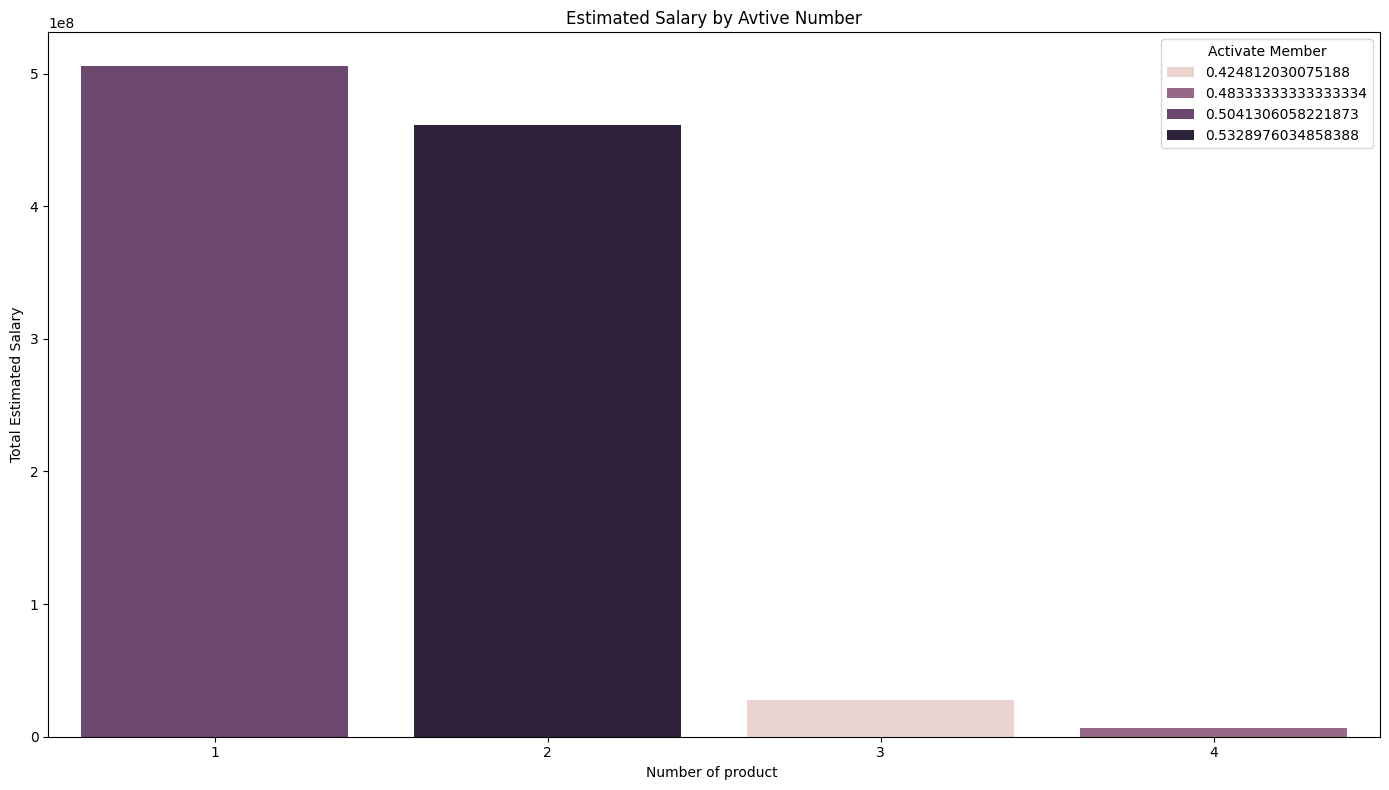

In [19]:
plt.figure(figsize=(14,8))
sns.barplot(data=df_acti_est,x='NumOfProducts',y='EstimatedSalary', hue='IsActiveMember')
plt.title('Estimated Salary by Avtive Number')
plt.xlabel('Number of product ')
plt.ylabel('Total Estimated Salary')
plt.legend(title='Activate Member', loc='upper right')
plt.tight_layout()
plt.show()

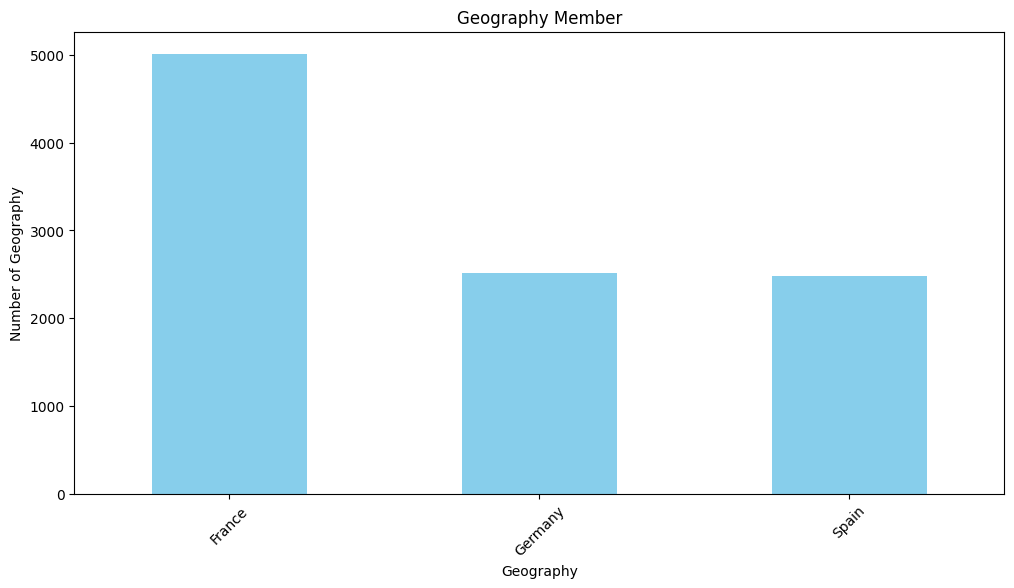

In [20]:
plt.figure(figsize=(12,6))
df_churn['Geography'].value_counts().plot(kind='bar',color='skyblue')
plt.title('Geography Member')
plt.xlabel('Geography')
plt.ylabel('Number of Geography')
plt.xticks(rotation=45)
plt.show()

In [21]:
df_churn.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [22]:
df_churn['Surname'].unique

<bound method Series.unique of 0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object>

<h1> Machine Learning

In [23]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

I use sklearn encoder for encoding `Gender` for make easy to manipulate data

In [24]:
label_encoder = LabelEncoder()
df_churn['Gender'] =label_encoder.fit_transform(df_churn['Gender'])

Now we use method to encoding a `Geography` 

In [25]:
df_churn = pd.get_dummies(df_churn,columns=['Geography'],drop_first=True)

In [26]:
df_churn.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


we should drop two columns `CustomerId` and `Surname`

In [27]:
df_churn.drop(columns=['CustomerId','Surname'], axis = 1, inplace=True)

In [28]:
X = df_churn.drop(columns='Exited')
y=df_churn['Exited']

<h1> Split Data by Training

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train[:10],X_test[:10]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802],
        [-0.85769482,  0.91324755,  0.19986603, -0.3483691 ,  0.7067467 ,
         -0.91668767,  0.64920267, -1.02583358,  1.09047006, -0.5794672

In [44]:
from sklearn.metrics import r2_score,mean_squared_error

<h3> Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
md = RandomForestClassifier(n_estimators=100,random_state=42)
md.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

prediction

In [35]:
y_pred_rand = md.predict(X_test)
y_pred_rand

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<h1> Loading confusion matric and classification_report and accuracy_score

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
conf_rand = confusion_matrix(y_test,y_pred_rand)
class_rep_rand = classification_report(y_test,y_pred_rand)
accur_rand = accuracy_score(y_test,y_pred_rand)


In [38]:
print(conf_rand)
print(class_rep_rand)
print(accur_rand)

[[1551   56]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8665


<h3> R squared

In [63]:
r2_linear_rand = r2_score(y_test,y_pred_rand)
r2_linear_rand

0.1544625849693848

<h3> R squared adjust

In [64]:
r2_adjust_linear_rand = 1-(1-r2_linear_rand) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
r2_adjust_linear_rand

0.1535313763625229

<h3> MSE

In [65]:
mse_linear_rand = mean_squared_error(y_test,y_pred_rand)
mse_linear_rand

0.1335

<h1> logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

make prediction

In [41]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
conf_log_reg = confusion_matrix(y_test,y_pred_log_reg)
class_log_reg = classification_report(y_test,y_pred_log_reg)
accur_log_reg = accuracy_score(y_test,y_pred_log_reg)

In [43]:
print(conf_log_reg)
print(class_log_reg)
print(accur_log_reg)


[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

0.811


<h3> R squared

In [45]:
r2_linear_reg = r2_score(y_test,y_pred_log_reg)
r2_linear_reg

-0.19705296959390473

<h3> R squard adjust

In [61]:
r2_adjust_linear_reg = 1-(1-r2_linear_reg)*(len(y)-1)/(len(y) - X.shape[1]-1)
r2_adjust_linear_reg

-0.19837130986878782

<h3>MSE

In [62]:
mse_linear_reg = mean_squared_error(y_test,y_pred_log_reg)
mse_linear_reg

0.189

<h1> Support vector machine

In [46]:
from sklearn.svm import SVC

In [47]:
svm_md = SVC(kernel='linear',random_state=42)
svm_md.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

prediction

In [48]:
y_pred_svm = svm_md.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
conf_svm = confusion_matrix(y_test,y_pred_svm)
class_svm = classification_report(y_test,y_pred_svm)
accur_avm = accuracy_score(y_test, y_pred_svm)

c:\Users\lagdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lagdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lagdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [50]:
print(conf_svm)
print(class_svm)
print(accur_avm)

[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

0.8035


<h3> R squared

In [66]:
r2_linear_svm = r2_score(y_test,y_pred_svm)
r2_linear_svm

-0.2445550715619167

<h3> R squared adjust

In [67]:
r2_adjust_linear_svm = 1-(1-r2_linear_svm)*(len(y) -1)/(len(y) -X.shape[1]-1)
r2_adjust_linear_svm

-0.24592572692707293

<h3> MSE

In [68]:
mse_linear_svm = mean_squared_error(y_test,y_pred_svm)
mse_linear_svm

0.1965

<h1> KNeighbore Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# KNN
kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(X_train,y_train) 

KNeighborsClassifier()

In [53]:
# prediction
y_pred_knn = kn_model.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
conf_matr_knn = confusion_matrix(y_test,y_pred_knn)
class_rep_knn = classification_report(y_test,y_pred_knn)
accu_knn = accuracy_score(y_test,y_pred_knn)

In [55]:
print(conf_matr_knn)
print(class_rep_knn)
print(accu_knn)

[[1514   93]
 [ 247  146]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000

0.83


<h3> R squared

In [69]:
r2_linear_knn= r2_score(y_test,y_pred_knn)
r2_linear_knn

-0.07671431127494066

<h3> R squared adjust

In [70]:
r2_adjust_linear_knn = 1-(1-r2_linear_knn)*(len(y)-1)/(len(y) - X.shape[1]-1)
r2_adjust_linear_knn

-0.07790011998779844

<h3> MSE

In [71]:
mse_linear_knn = mean_squared_error(y_test,y_pred_knn)

<h1> Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gbc_model = GradientBoostingClassifier(n_estimators=100,random_state=42)
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [58]:
# prediction
y_pred_gbc = gbc_model.predict(X_test)
y_pred_gbc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
conf_matr_gbc = confusion_matrix(y_test,y_pred_gbc)
class_rep_gbc = classification_report(y_test,y_pred_gbc)
accur_gbc = accuracy_score(y_test,y_pred_gbc)

In [60]:
print(conf_matr_gbc)
print(class_rep_gbc)
print(accur_gbc)

[[1543   64]
 [ 201  192]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.8675


<h3> R squared

In [72]:
r2_linear_gbc = r2_score(y_test,y_pred_gbc)
r2_linear_gbc

0.16079619856511973

<h3> R squared adjust

In [73]:
r2_adjust_linear_gbc = 1-(1-r2_linear_gbc)*(len(y)-1)/(len(y)-X.shape[1]-1)
r2_adjust_linear_gbc

0.15987196530362757

<h3> MSE

In [74]:
mse_linear_gbc = mean_squared_error(y_test,y_pred_gbc)
mse_linear_gbc

0.1325